## Analyzing Temperature and Snowfall Change in the White Mountains

Author: Nick Querrazzi

3/28/2023

License: MIT -- https://opensource.org/licenses/MIT

### Introduction
With climate change's impacts growing more prevalent each year, we must learn to use historical changes in our environment to prepare us for what the future may look like. This script analyzes any changes in both the temperature and the snowfall on Mt. Washington in the White Mountains of New Hampshire. The script will also look for any correlation between possible rising temperatures and a change in snowfall. The White Mountains are a popular winter destination for winter sport enthusiasts. If winters are becoming warmer and getting less snow, will it bring less tourists and therefore less money into the area? We must understand the trends in temperature and snowfall in order to protect our winters, if necessary. Not only does protecting our winters protect the economy and community in the White Mountains, but it also preserves the natural environment and wildlife that call the White Mountains home. Researching any trends in temperature and the impact those trends have on snowfall can be crucial in understanding how we are impacting the natural world around us.

### Hypothesis
It is hypothesized that there is an increasing trend in temperature and that it is leading to a decrease in snowfall in the White Mountains of New Hampshire throughout the winter (Dec-Mar).

### Site Description
The data being analyzed was recorded on Mt. Washington in New Hampshire. Mt. Washginton is the tallest mountain in New Hampshire and its peak is a popular tourist destination as well as a valubale research location.  The measurements took place at an elevation of 6,272' and started in 1948 until 2023. The elevation is a few thousand feet higher in elevation than most of the surrounding ski mountains, although this data provided the most thorough and longest dataset. While there may be differences in amount of snowfall and temperature, the trends this analysis provides will be applicable to the surrounding White Mountains and ski resorts. 

The dataset obtained through NOAA (gauge: USW00014755) from Mt.Washington provides daily snowfall, minimum temperature, and maximum temperature each day from 1948 until 2023.

Link to data: https://www.ncei.noaa.gov/access/search/data-search/normals-hourly?bbox=44.370,-71.403,44.170,-71.203

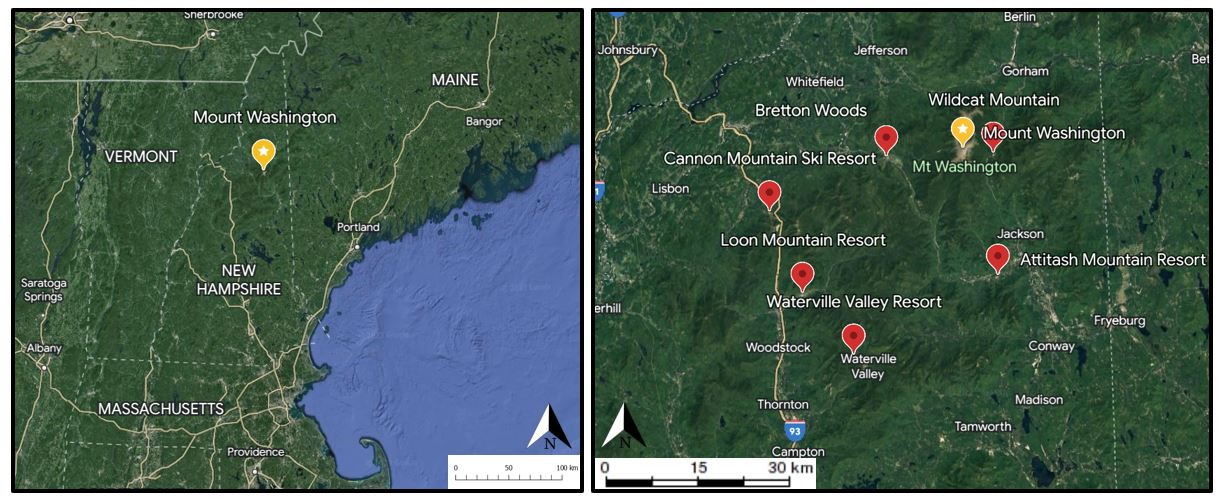

### Methods
To analyze whether there is a significant change in temperature and if it is affecting snowfall depths in the White Mountains of New Hampshire, both daily temperature and snowfall measurements from Mt. Washington will be used. The data will first be loaded into the program, irrelevent columns (ie those unrelated to snowfall and temperature) will be removed, and the data will be cut to the first and last full year. All nan values will also be removed. Because the recorded average temperatures provided by NOAA are very unreliable, the minimum and maximum temperatures will be used to calculate average daily temperature. A new dataframe called winterdata containing data for just the winter months (December-March) will then be created by replacing all other data with nan. Each winter year will be labeled by the year the December fell in for analysis purposes. For each of these winter years the average temperature and the total snowfall will be calculated. Following the data analysis, the data will be plotted. First, the raw temperature and snowfall data will be plotted as a time series. Then the average temperature for each winter and total snowfall for each winter will also be plotted. Subsequently, a Theil-Sen regression will be used to determine any significant correlation in temperature change, snowfall change, and any impact temperature may be having on snowfall. The p-values will be displayed on the graph to be used to show significance if <0.05. The slopes will also be displayed to show the level of significance. Depending on the results, the data may be cleaned to remove any outliers and then the regression will be performed again for the new data.

### Results

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
#%% Specify Parameters

#Name of input file with extension
infile_names = ['mt washington.csv']
#Data is in US Customary Units

#Create start and end dates
start_date = '1948-01-01'
end_date = '2022-12-31'

In [3]:
#%% Load Data

#Load data and set index
data = pd.read_csv(infile_names[0], comment='#',
                   parse_dates=['DATE'], index_col=['DATE'])

#Drop unnecessary columns
columns=['SNOW','TMAX','TMIN']
data = data[columns]

#Cutting data to start and end dates
data=data[start_date:end_date]

#Drop NaN values from the dataset before analysis
data = data.dropna()

The infile name, start date, and end date were all first specified. Dates were chosen to trim extraneous detail and only leave full years of data. The data, which is in US Customary Units, was then loaded and the index was set to the date. Unnecessary columns were dropped, the dataset was trimmed to the start and end dates, and any missing values were dropped. It is important to drop the missing values because you cannot perform a regression with missing values.

In [4]:
#%% Data Analysis

#Creating an average temperature column using min and max temperatures from each day
data['TAVG']=(data.TMIN+data.TMAX)/2

#%% Create dataframe consisiting of just winter season, dec1-mar31
#Trim data to first Dec1 and last Mar 30
startdate=data.loc[(data.index.month==12)].index[0]
enddate=data.loc[(data.index.month==3)].index[-1]
winterdata = data[startdate:enddate].copy()

#Numbering each winter with the year for December
winterdata['month']=winterdata.index.month
winterdata['winteryear']=winterdata.index.year
winterdata.loc[winterdata['month']<=3,'winteryear']=winterdata.loc[winterdata['month']<=3,'winteryear'] -1

#Replace data with Nan outside winter months (dec,jan,feb,mar)
winterdata.loc[~((winterdata.index.month >= 12) | (winterdata.index.month <= 3))] = pd.NA

#%% Winter Year Calculations
#Create new dataframe with yearly values for snowfall sum and average temperature
data_annual = winterdata[['SNOW']].groupby(winterdata.winteryear).sum()
data_annual['tavg'] = winterdata['TAVG'].groupby(winterdata.winteryear).mean()

#Rename columns in data_annual
data_annual.rename(columns = {"SNOW":"Snowfall (in)",'tavg':'Temp (F)'},inplace=True)

print(data)
print(winterdata)
print(data_annual)

            SNOW  TMAX  TMIN  TAVG
DATE                              
1948-01-01   0.0  18.0   6.0  12.0
1948-01-02   3.7  16.0   4.0  10.0
1948-01-03   0.7  15.0   6.0  10.5
1948-01-04   0.0  20.0  12.0  16.0
1948-01-05   0.0  22.0  11.0  16.5
...          ...   ...   ...   ...
2022-11-27   0.0  36.0  28.0  32.0
2022-11-28   2.8  33.0  10.0  21.5
2022-11-29   0.0  26.0  16.0  21.0
2022-11-30   1.6  34.0  15.0  24.5
2022-12-31   0.0  39.0  32.0  35.5

[27348 rows x 4 columns]
            SNOW  TMAX  TMIN  TAVG  month  winteryear
DATE                                                 
1948-12-01   3.2  18.0  12.0  15.0   12.0      1948.0
1948-12-02   0.0  20.0   7.0  13.5   12.0      1948.0
1948-12-03   0.0  28.0  16.0  22.0   12.0      1948.0
1948-12-04   0.0  39.0  25.0  32.0   12.0      1948.0
1948-12-05   0.0  41.0  29.0  35.0   12.0      1948.0
...          ...   ...   ...   ...    ...         ...
2022-03-27   5.0  19.0  -2.0   8.5    3.0      2021.0
2022-03-28   0.2  -2.0 -13.0  -7.

The majority of the data analysis was performed in the cell above. First, the minimum and maximum temperatures were used to calculate an average daily temperature. This was used over the measured average temperature because the data was much more complete for the minimums and maximums than it was for the average.To get a better idea of what was happening each winter,the data was trimmed to the first Dec 1 and the last Mar 30, and then each Dec 1 to Mar 30 was labeled with the year of that December. All values outside of these months were dropped, as they are not relevant to the hypothesis. By doing this, the total snowfall for each winter along with each winters average temperature could then be calculated. These values were put in the dataset called data_annual and the columns were renamed accordingly. This new dataset will be the basis for the rest of the analysis performed. 

In [5]:
#%% Function to plot data

def plotdata(data,title,ylabel):
    fig, ax = plt.subplots() # Create plot to display snowfall data
    ax.plot(data.index, data, color='#e74c3c', linewidth=1, label='Snowfall') # Plot snowfall data with a red line and thicker linewidth
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold') # Add y-axis label with a larger font size and bold text
    ax.set_title(title, fontsize=16, fontweight='bold') # Add plot title with a larger font size and bold text
    plt.xticks(fontsize=12, fontweight='bold') # Increase the font size and weight of the x-tick labels
    ax.grid(axis='both', color='#c7c7c7', linestyle='-', linewidth=1) # Show the grid lines on both axes
    plt.show() # Show the plot

Above is a function to plot the analyzed data as a time series. This allows any possible trends to be seen before performing the regression to statistically find any trends in the data. The function will be used to plot the raw temperature and snowfall data along with the data for each individual winter. The function is called to plot those four plots in the following cell.

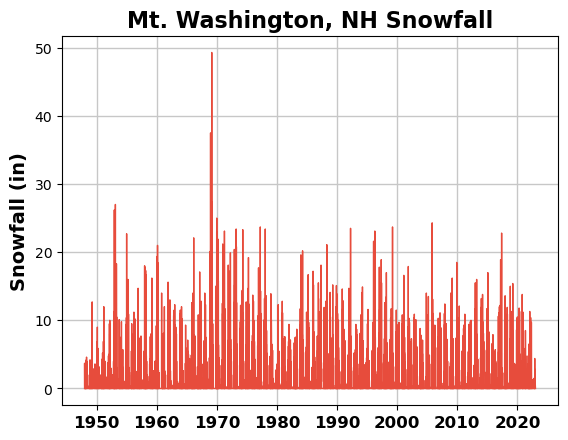

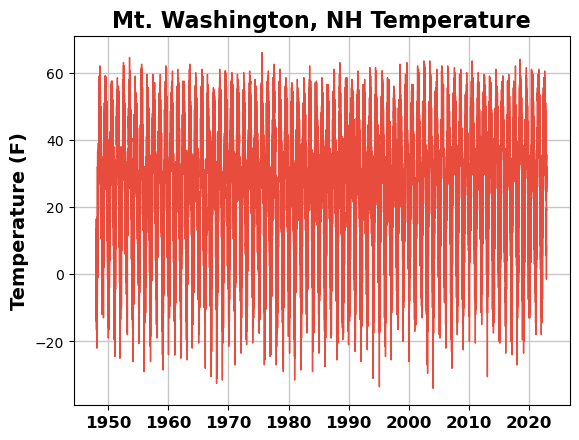

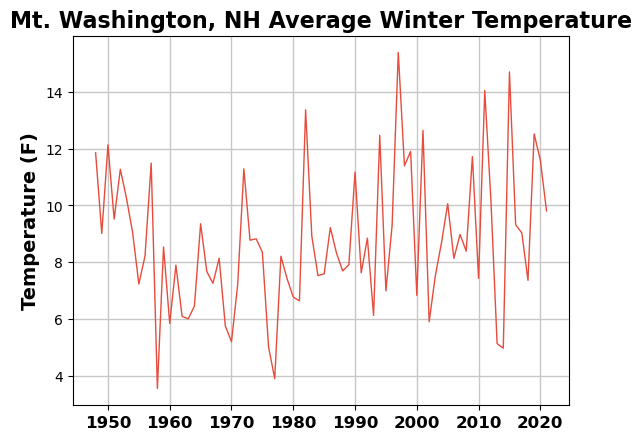

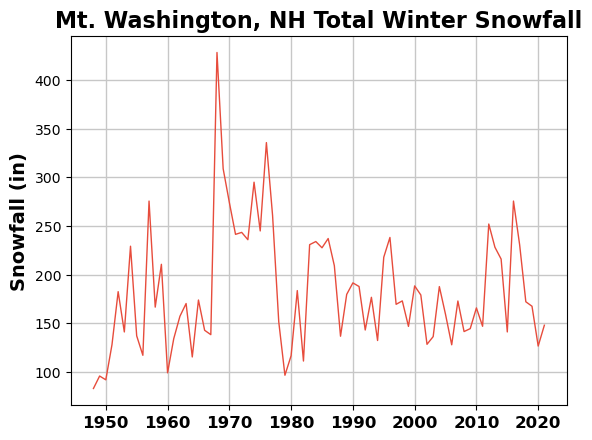

In [6]:
#%% Plot data

#Plot raw snowfall data
plotdata(data['SNOW'],'Mt. Washington, NH Snowfall', 'Snowfall (in)')

#Plot raw temperature data
plotdata(data['TAVG'],'Mt. Washington, NH Temperature', 'Temperature (F)')

#Plot average winter temperature
plotdata(data_annual['Temp (F)'],'Mt. Washington, NH Average Winter Temperature','Temperature (F)')

#Plot total winter snow depths
plotdata(data_annual['Snowfall (in)'], 'Mt. Washington, NH Total Winter Snowfall','Snowfall (in)')


In [7]:
#%% Perform statistics to determine significant change in snowfall

#Perform nonlinear statistics to determine significance

def lsqplot(x, y, title, nonparam=False, xlabel=None, ylabel=None, xtoplot=None):
    """ Plot least-squares fit to data.

    Function to create scatter plot of x-y data, including regression
    line(s) and annotation with regression parameters and statistics.

    Parameters
    ----------
    x : array or series
        Independent 1-D numerical data
    y : array or series
        Independent 1-D numerical data with the same length as x    
    nonparam : boolean
        Toggle to determine whether to include non-parametric fit 
    xlabel : string
        Text to use as x-label on plot
    ylabel : string
        Text to use as y-label on plot
    xtoplot : array or series
        Alternative positions for x data to use in plotting not fitting;
        shuold be 1-D numerical or datetime data with same length as x
    """

    sen_coeff = stats.theilslopes(y, x, 0.95)
    tau = stats.kendalltau(x, y)

    if xtoplot is None:
        xtoplot = x

    fig, ax = plt.subplots()
    ax.plot(xtoplot, y, 'k.')
    xx = ax.get_xlim()
    yy = ax.get_ylim()
    ax.set_ylim(bottom=yy[0]*.95)

    if nonparam is True:
        ax.plot(xtoplot, sen_coeff.intercept + sen_coeff.slope *
                x, 'r-', label='Theil-Sen regression')
        ax.annotate(f'Theil-Sen slope = {sen_coeff.slope:.4f} +/- {0.5*(sen_coeff.high_slope - sen_coeff.low_slope):.4f}',
                    xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] + 0.05*(yy[1]-yy[0])),
                    horizontalalignment='right')
        ax.annotate(f'Tau correlation = {tau.correlation:.3f}; p = {tau.pvalue:.6f}',
                    xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] - 0.001*(yy[1]-yy[0])),
                    horizontalalignment='right')

    ax.set_title(title, fontsize=16, fontweight='bold') # Add plot title with a larger font size and bold text
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold') # Add x-axis label with a larger font size and bold text
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold') # Add y-axis label with a larger font size and bold text
    ax.legend(frameon=True, loc='upper right')
    ax.grid(axis='both', color='#c7c7c7', linestyle='-', linewidth=1) # Show the grid lines on both axes
    plt.show()

Another function was created above to create a scatter plot that performs a Theil-Sen regression. The regression plots only the winter data, with plots for the following: snowfall totals, average temperature, and snowfall vs temperature. By creating a regression, any significant trends or coorelation will be appararent by using the p-value. Any p-value less than 0.05 signifies a significant trend in the data. The function was then called in the cells below.

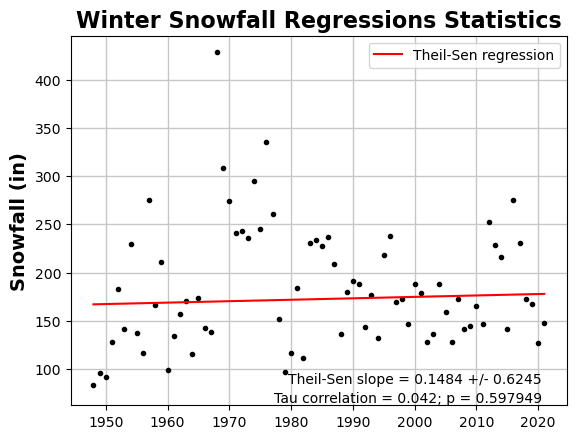

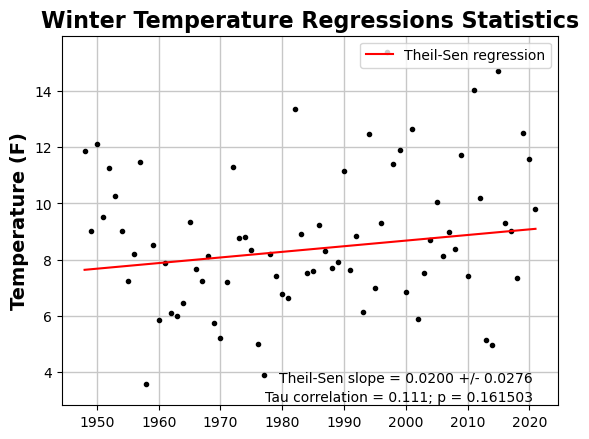

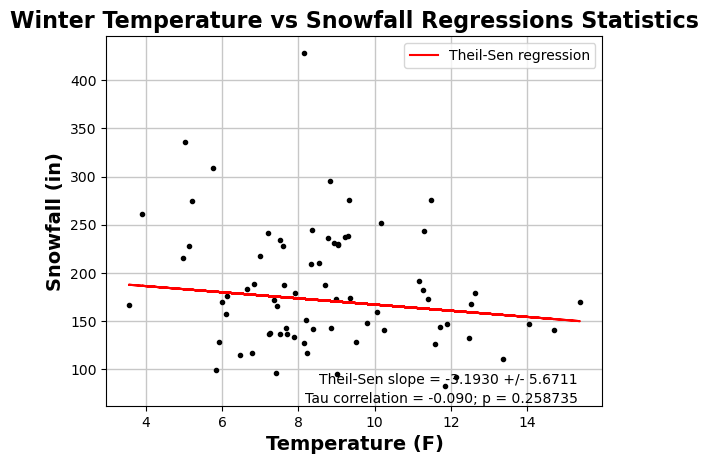

In [8]:
#%% Perform statistics to determine significant change in snowfall

x = data_annual.index.values
y = data_annual['Snowfall (in)']
lsq_coeff = stats.linregress(x, y)
slope = lsq_coeff.slope    
intercept = lsq_coeff.intercept
title = 'Winter Snowfall Regressions Statistics'

#Plot the data
lsqplot(x, y, title, nonparam=True, xtoplot = x, ylabel='Snowfall (in)')

#%% Perform statistics to determine signifcant change in temperature

x = data_annual.index.values
y = data_annual['Temp (F)']
lsq_coeff = stats.linregress(x, y)
slope = lsq_coeff.slope    
intercept = lsq_coeff.intercept
title = 'Winter Temperature Regressions Statistics'

#Plot the data
lsqplot(x, y, title, nonparam=True, xtoplot = x, ylabel='Temperature (F)')

#%% Perform statistics to determine signifcant change in snow depth vs temp for each winter season

x = data_annual['Temp (F)']
y = data_annual['Snowfall (in)']
lsq_coeff = stats.linregress(x, y)
slope = lsq_coeff.slope    
intercept = lsq_coeff.intercept
title = 'Winter Temperature vs Snowfall Regressions Statistics'

#Plot the data
lsqplot(x, y,title, nonparam=True, xtoplot = x,xlabel='Temperature (F)', ylabel='Snowfall (in)')


As seen in the plots above, no significant trends were found as all p-values are greater than 0.05. Because of this, using the previous time series plots, the beginning 7 years of data were identified to be skewing the temperature data. By trimming the data to 1955-2022 and performing a regression on this new time period, a clear trend can be seen in the plot below. The p-value is less than 0.05 and the positive slope is 0.0448 which means there a significant increasing temperature was found.

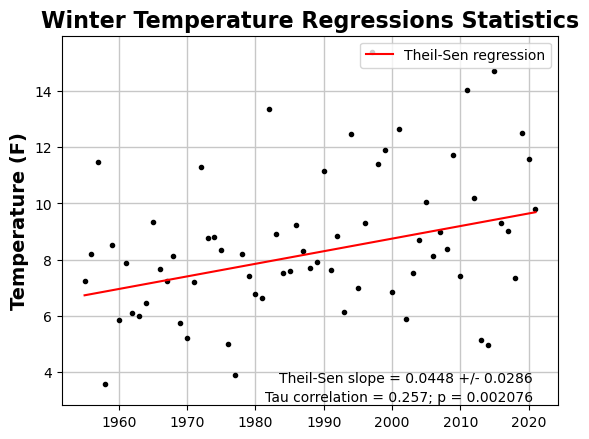

In [9]:
datatrim = data_annual[1955:2022]

x = datatrim.index.values
y = datatrim['Temp (F)']
lsq_coeff = stats.linregress(x, y)
slope = lsq_coeff.slope    
intercept = lsq_coeff.intercept
title = 'Winter Temperature Regressions Statistics'

#Plot the data
lsqplot(x, y, title, nonparam=True, xtoplot = x, ylabel='Temperature (F)')


### Conclusion
When looking at the regression statistics, and more specifically the p-value, it can be seen that neither the temperature or snowfall showed any significant trends over the total length of available data (1948-2022). A p-value of less than 0.05 would be considered significant and the temperature and snowfall plots had p-values of 0.16 and 0.6 when considering the entire datset, respectively. The regression on snowfall vs temperature also showed no significant relationship with a p-value of 0.26. Although, there was significance in a temperature increase for the shortened time period (1955-2022), which removed the first few years of the dataset (p-value=0.002). The lack of significance in the snowfall data could be attibuted to the shorter timeframe analyzed in respect to how long it takes for the change in temperature to actually have an impact. Considering these results, my hypothesis was incorrect, as it predicted a significant increase in temperature and then a significant decrease in snowfall. An increase in teperature was only seen in the shortened timeframe, and no significant trends were found in snowfall. Despite this, this analysis can still be used to draw helpful conclusions. For example, the shortened time period did show a significant increase in temperature which could be used to calculate the point at which it will have an impact on snowfall. Usually, an increase in snowfall is first seen with increasing temperatures, and then when the temperature gets too high there will be a reduction in snowfall. Also, although the p-value showed no significance, the slope on the regression for temperature vs snowfall did favor my hypothesis by suggesting snowfall was decreasing with an increasing temperature. This could suggest possible significance in the future or with a larger dataset. If these predictions are correct, the ski industry and other winter sports economy in northern New Hampshire should be prepared to adapt for a shorter and less fruitful winter season. This could be detrimental to the economy and may cause a shift in purpose for the area.This is why it is extremely important to actively research and fight to protect our winters and our climate as whole.


    

### Literature Cited

“Data Access.” National Centers for Environmental Information (NCEI), https://www.ncei.noaa.gov/access/search/data-search/normals-hourly?bbox=44.370%2C-71.403%2C44.170%2C-71.203. 
